In [1]:
import cv2 

img = cv2.imread('C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/m3.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

1200 1920 3 3


# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [4]:
imgss = "C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset"
dirname = os.path.join(os.getcwd(), imgss)
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\
C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\bmw318dFull 1
C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\bmw320Full 11730
C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\bmw330eFull 11730
C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\bmw330iFull 11730
C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/dataset\bmwm3Full 11730
Directorios leidos: 5
Imagenes en cada directorio [11731, 11730, 11730, 11730, 11729]
suma Total de imagenes en subdirs: 58650


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  58650


In [6]:
coches=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    coches.append(name[len(name)-1])
    indice=indice+1

0 bmw318dFull
1 bmw320Full
2 bmw330eFull
3 bmw330iFull
4 bmwm3Full


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

MemoryError: Unable to allocate 1.05 GiB for an array with shape (58650, 80, 80, 3) and data type uint8

# Creamos Sets de Entrenamiento y Test

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (46920, 80, 80, 3) (46920,)
Testing data shape :  (11730, 80, 80, 3) (11730,)


Text(0.5, 1.0, 'Ground Truth : 0')

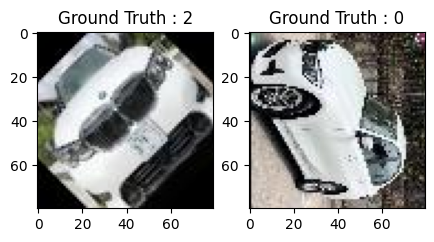

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

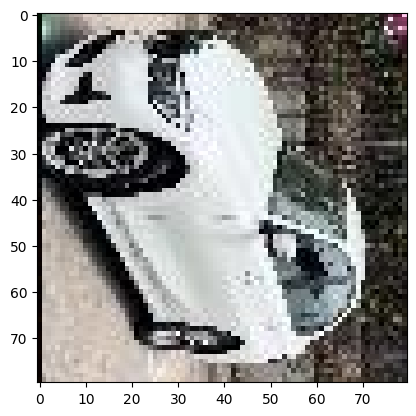

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(37536, 80, 80, 3) (9384, 80, 80, 3) (37536, 5) (9384, 5)


# Creamos el modelo de CNN

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-2 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 25 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
coche_model = Sequential()
coche_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(80, 80, 3)))
coche_model.add(LeakyReLU(alpha=0.1))
coche_model.add(MaxPooling2D((2, 2), padding='same'))  # 80x80 -> 40x40
coche_model.add(Dropout(0.5))

# Segunda capa convolucional
coche_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
coche_model.add(LeakyReLU(alpha=0.1))
coche_model.add(MaxPooling2D((2, 2), padding='same'))  # 40x40 -> 20x20 (aproximación cercana a 21x21)
coche_model.add(Dropout(0.5))

# Aplanamiento y capas densas
coche_model.add(Flatten())
coche_model.add(Dense(32, activation='linear'))
coche_model.add(LeakyReLU(alpha=0.1))
coche_model.add(Dropout(0.5))
coche_model.add(Dense(nClasses, activation='softmax'))

c:\Users\angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
coche_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       819,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,789 (3.20 MB)

 Trainable params: 838,789 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
coche_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)

c:\Users\angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
coche_train = coche_model.fit(
    train_X, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)


Epoch 1/25


In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
datali = "C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/coche.h5"
coche_model.save(datali)

# Evaluamos la red

In [ ]:
test_eval = coche_model.evaluate(test_X, test_Y_one_hot, verbose=1)

367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8401 - loss: 0.4804


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.46164649724960327
Test accuracy: 0.8465473055839539


In [ ]:
coche_train.history

{'accuracy': [0.2746962904930115,
  0.39306265115737915,
  0.4319320023059845,
  0.4782342314720154,
  0.5312233567237854,
  0.5702258944511414,
  0.6026747822761536,
  0.6240941882133484,
  0.646605908870697,
  0.6670929193496704,
  0.6805467009544373,
  0.6936008334159851,
  0.7041506767272949,
  0.7166720032691956,
  0.7281809449195862,
  0.7348678708076477,
  0.7428335547447205,
  0.7554613947868347,
  0.762627899646759,
  0.7644927501678467],
 'loss': [1.5476348400115967,
  1.3888963460922241,
  1.3054258823394775,
  1.227256417274475,
  1.1438019275665283,
  1.0759923458099365,
  1.011511206626892,
  0.9586859345436096,
  0.9129475355148315,
  0.8690282702445984,
  0.8322063684463501,
  0.80433589220047,
  0.7814124822616577,
  0.7514536380767822,
  0.7230575680732727,
  0.7029016613960266,
  0.6805707216262817,
  0.6555433869361877,
  0.636784017086029,
  0.6244034767150879],
 'val_accuracy': [0.3807544708251953,
  0.3503836393356323,
  0.48103153705596924,
  0.5295183062553406,

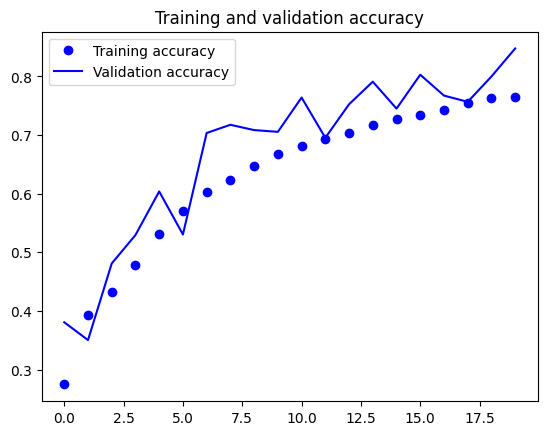

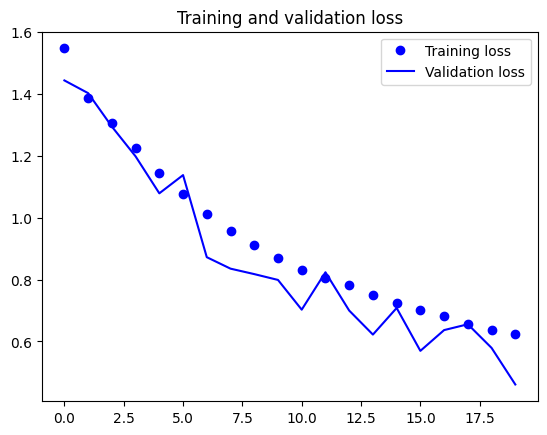

In [ ]:
accuracy = coche_train.history['accuracy']
val_accuracy = coche_train.history['val_accuracy']
loss = coche_train.history['loss']
val_loss = coche_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = coche_model.predict(test_X)

367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


In [ ]:
predicted_classes=[]
for predicted_coche in predicted_classes2:
    predicted_classes.append(predicted_coche.tolist().index(max(predicted_coche)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((11730,), (11730,))

# Aprendamos de los errores: Qué mejorar

Found 9930 correct labels


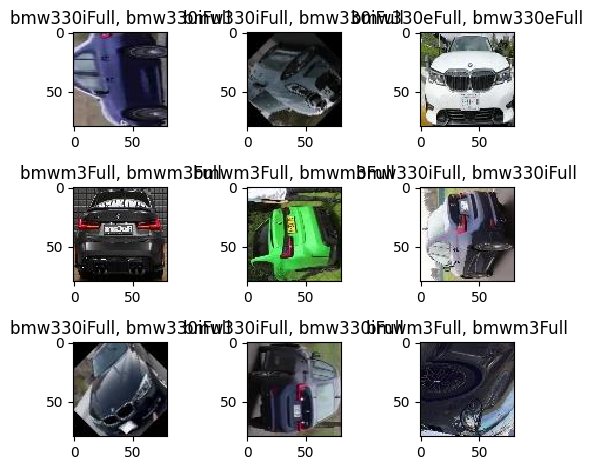

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(80,80,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(coches[predicted_classes[correct]],
                                                    coches[test_Y[correct]]))

    plt.tight_layout()

Found 1800 incorrect labels


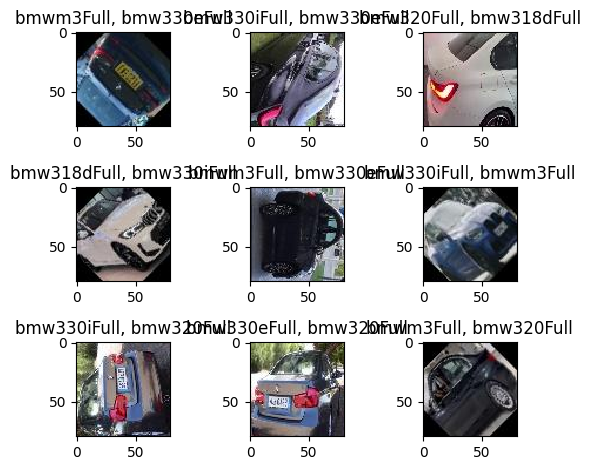

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(80,80,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(coches[predicted_classes[incorrect]],
                                                   coches[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.76      0.82      2427
     Class 1       0.87      0.90      0.89      2379
     Class 2       0.89      0.80      0.84      2388
     Class 3       0.75      0.90      0.82      2314
     Class 4       0.86      0.88      0.87      2222

    accuracy                           0.85     11730
   macro avg       0.85      0.85      0.85     11730
weighted avg       0.85      0.85      0.85     11730



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/m3.jpg']

modelo_h5 = 'C:/Users/angel/OneDrive/Escritorio/IA/CNNFINAL/coche.h5'
coches_model = load_model(modelo_h5)

for filepath in filenames:
    image = plt.imread(filepath)
    image_resized = resize(image, (21, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = coches_model.predict(test_X)

# Asegúrate de tener una lista de etiquetas o categorías en 'sriesgos'
sriesgos = ['bmw318dFull', 'bmw320Full', 'bmw330eFull','bmw330iFull','bmwm3Full']  # Reemplaza con tus etiquetas reales

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], sriesgos[np.argmax(img_tagged)])
